### Building a simple sigmoid neural network model to recognize digit number.
##### using batch gradient descent
##### reference to Andrew Ng's Coursera Machine Learning Course

In [919]:
import pandas as pd
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import accuracy_score

% matplotlib inline 

sigmoid gradient
$${g}'(z)=\frac{d}{dz}g(z)=g(z)(1-g(z))$$
where
$$sigmoid(z)=g(z)=\frac{1}{1+e^{-z}}$$

### Cost Function with regularization
$$J(\theta )) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K}[-y_{k}^{(i)}log((h_\theta(x^{(i)}))_{k}) - (1-y_{k}^{(i)})log(1-(h_{\theta}(x^{(i)}))_{k})] + \frac{\lambda }{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_{l}}\sum_{j=1}^{s_{l+1}}(\theta_{ji}^{(l)})^{2}$$

- Training set is $${(x^{1}, y^{1}), (x^{2}, y^{2}), (x^{3}, y^{3}) ... (x^{m}, y^{m})}$$
- L = number of layers in the network
- S<sub>l</sub> = number of units (not counting bias unit) in layer l 
- K is number of units in output layer S<sub>L</sub> = K
-  $\theta^{l}_{ji}$ is the weight from the ith unit of layer l to jth unit of layer l+1

# TODO complement explanation of neural network

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def sigmoidGradient(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [944]:
def initWeight(numUnits):
    # input are #units of every layer
    # randomly initialize theta
    w = []
    # let theta be small number
    epsilon_init = 0.01
    for i in range(len(numUnits)-1):
        w.append(np.random.random((numUnits[i] + 1, numUnits[i+1]))*epsilon_init)
    return w

In [504]:
def NNcost(y, y_pre, theta, lamb):
    m = len(y)
    L = len(theta)
    regular = 0
    # calculate regularization term
    for i in range(L):
        # bias weight not included
        regular += np.sum(np.square(theta[i][:,1:])) 
    regular = regular * lamb / m
    cost = np.sum(- y * np.log(y_pre) - (1 - y) * np.log(1 - y_pre))/m + regular
    return cost

### train

In [505]:
def gradient(x, y, theta, lamb):
    # number of theta
    L = len(theta)
    # number of data sets
    m = len(x)
    # save every a and z for backpropagation
    a = []
    z = []
    current_a = x
    current_z = 0
    for i in range(L):
        # add bias to input
        current_a = np.c_[np.ones(m),current_a]
        a.append(current_a)
        current_z = np.dot(current_a , theta[i])
        z.append(current_z)
        current_a = sigmoid(current_z)
    
    # value of cost function
    cost = NNcost(y, current_a, theta, lamb)
    
    # calculate the gradient of theta for updating
    gradient = []
    error = []
    l = L-1
    current_error = current_a - y
    error.append(current_error)
    delta = []
    while l > 0:
        current_error = np.dot(current_error,np.transpose(theta[l])) * sigmoidGradient(np.c_[np.ones(len(z[l-1])),z[l-1]])
        current_error = current_error[:,1:]
        error.append(current_error)
        l -= 1
        
    for j in range(L):
        delta.append(np.dot(np.transpose(a[j]),error[L-1-j]))
    
    theta_temp = [np.c_[np.zeros(len(t)),t[:,1:]] for t in theta]
    theta_grad = []
    
    for i in range(L):
        theta_grad.append(delta[i]/m + lamb/m * theta_temp[i])
    
    return (cost, theta_grad)

In [874]:
def updateTheta(alpha, theta, theta_grad):
    # batch gradient descent
    for i in range(len(theta)):
        theta[i] = theta[i] - alpha*theta_grad[i]
    return theta

In [878]:
def train(x, y, theta, alpha, lamb, max_cost, max_iter):
    cost = 1
    k = 0
    while cost > max_cost and k < max_iter:
        cost,theta_grad = gradient(x,y,theta,lamb)
        theta = updateTheta(alpha, theta, theta_grad)
        k = k + 1
    return theta, cost

In [848]:
def predict(x, theta):
    # number of layers
    L = len(theta)
    # number of data sets
    m = len(x)
    a = x
    for i in range(L):
        # add bias to input
        a = np.c_[np.ones(m),a]
        z = np.dot(a , theta[i])
        a = sigmoid(z)
    return a

In [721]:
def oneHot(m):
    n = len(np.unique(m))
    r = np.zeros((len(m), n))
    for i in range(len(m)):
        r[i,m[i]] = 1
    return r

In [886]:
# data from https://www.kaggle.com/c/digit-recognizer
df_train=pd.read_csv('data/train.csv')

In [924]:
X = df_train.drop("label", axis=1)

In [969]:
def showNum(arr):
    arr = np.array(arr,dtype=np.uint8)
    arr.resize((28, 28))
    plt.imshow(arr,cmap=cm.binary)

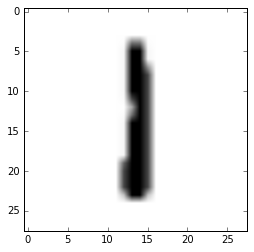

In [970]:
showNum(X.ix[2])

In [887]:
label = df_train["label"]

In [935]:
X_train = X[:10000]
X_test = X[10000:12000]

# normalization
X_train = np.array(X_train) / 256.0
y_train = oneHot(label[:10000].values)
X_test = np.array(X_test) / 256.0
y_test = oneHot(label[10000:12000].values)

In [1044]:
# initialize theta
theta = initWeight([784, 40, 10])
# learning rate
alpha = 0.3
# lambda for regularization
lamb = 1
max_cost = 0.01
max_iter = 500

In [1045]:
# train the model
theta, cost = train(X_train, y_train, theta, alpha, lamb, max_cost, max_iter)

In [1046]:
# predict the result of test set
y_pre = predict(X_test, theta)

In [1047]:
accuracy_score(np.round(y_pre), y_test)

0.72199999999999998

In [1003]:
y_pre[0]

array([  1.88323005e-03,   1.31306552e-05,   7.09939388e-02,
         2.20332811e-03,   4.29729705e-03,   2.51698676e-04,
         1.18142758e-02,   3.65739354e-05,   5.46591100e-04,
         2.53982526e-04])

In [1004]:
y_test[0]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

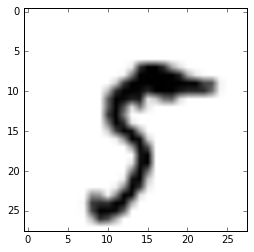

In [1002]:
showNum(X.ix[10001])

In [995]:
label[10001]

5

In [1049]:
theta = initWeight([784, 40, 10])
params = {"alpha": [0.03, 0.1, 0.3, 1],
          "lamb": [0.1, 1, 10],
          "max_cost": [0.01],
          "max_iter": [500, 1000, 5000, 10000]}

In [1050]:
def gridSearch(params):
    for alpha in params["alpha"]:
        for lamb in params["lamb"]:
            for max_cost in params["max_cost"]:
                for max_iter in params["max_iter"]:
                    new_theta, cost = train(X_train, y_train, theta, alpha=alpha, lamb=lamb, max_cost=max_cost, max_iter=max_iter)
                    y_pre = predict(X_test, new_theta)
                    print "alpha=%s, " % alpha, "lamb=%s, " % lamb,
                    print "max_cost=%s, " % max_cost,"max_iter=%s, " % max_iter, 
                    print "accuracy = %s" % accuracy_score(np.round(y_pre), y_test)

In [ ]:
gridSearch(params)